<a href="https://colab.research.google.com/github/rahmanS1d1q/churn-prediction-telco-customers/blob/main/Predicting_Customer_Churn_in_SaaS_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Get Data From Kaggle**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [3]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Cleaning data**

In [4]:
import pandas as pd
import numpy as np


# ===========================
# 1. Drop kolom yang tidak berguna
# ===========================
df.drop(columns=['customerID'], inplace=True)

# ===========================
# 2. Konversi 'TotalCharges' ke float
# ===========================
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# ===========================
# 3. Tangani missing values
# ===========================
# Cek missing
print(df.isnull().sum())
# Isi NaN di 'TotalCharges' dengan median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# ===========================
# 4. Encoding target variable 'Churn'
# ===========================
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# ===========================
# 5. Pisahkan kolom kategorikal & numerik
# ===========================
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Churn')  # pastikan target tidak ikut

# ===========================
# 6. Encoding kolom kategorikal (One-Hot Encoding)
# ===========================
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# ===========================
# 7. Standarisasi (Optional, untuk modeling)
# ===========================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# ===========================
# Final Check
# ===========================
print("\n✅ Data Siap Digunakan!")
print(df_encoded.shape)
df_encoded.head()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


/tmp/ipython-input-4-3020466537.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)



✅ Data Siap Digunakan!
(7043, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994242,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,-0.439916,0.066327,-0.259629,-0.173244,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.439916,-1.236724,-0.362660,-0.959674,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.439916,0.514251,-0.746535,-0.194766,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,-0.940470,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


# **Ekplorasi Data Analys**

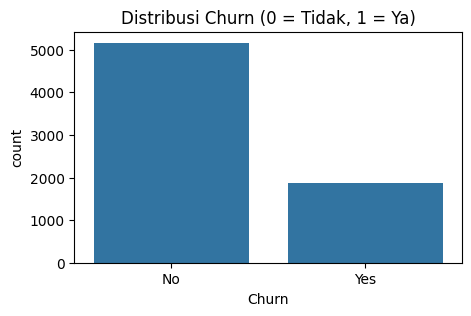

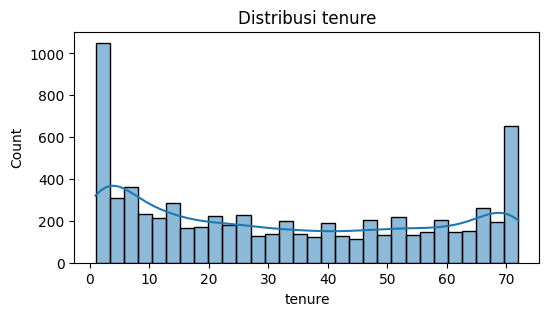

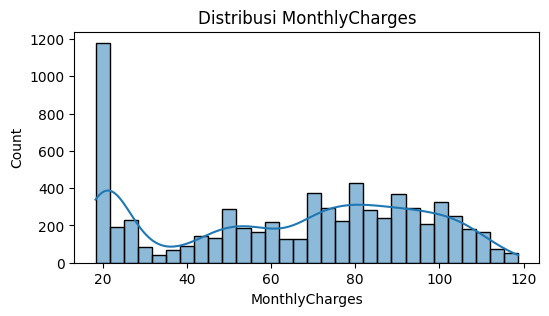

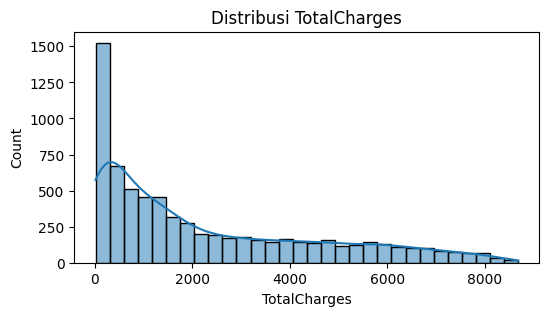

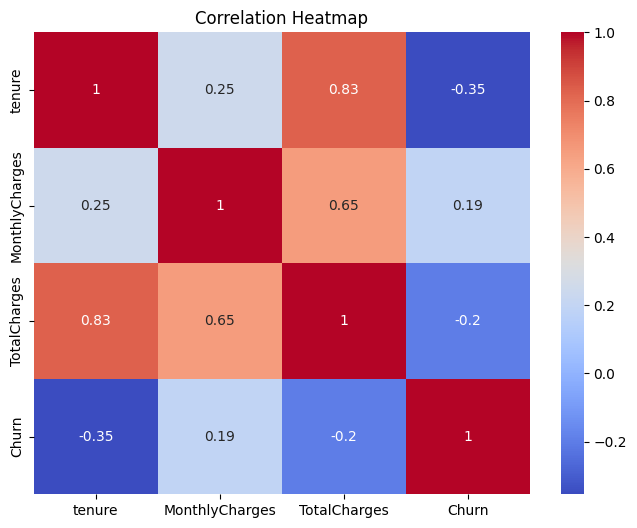

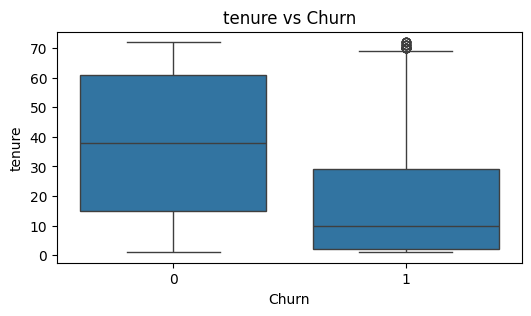

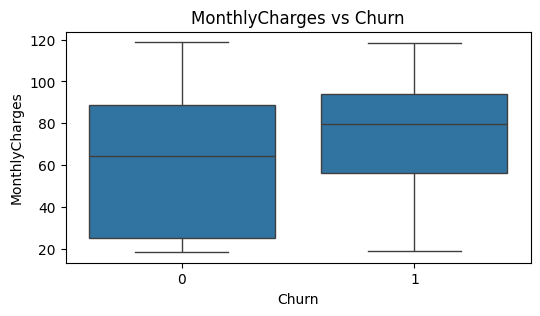

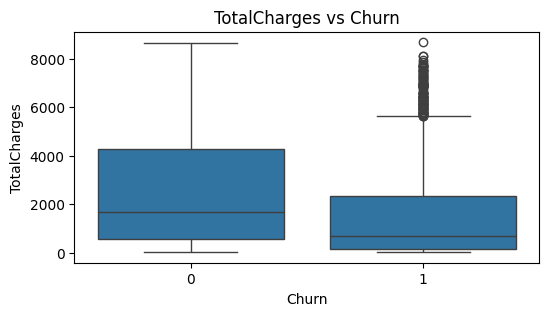

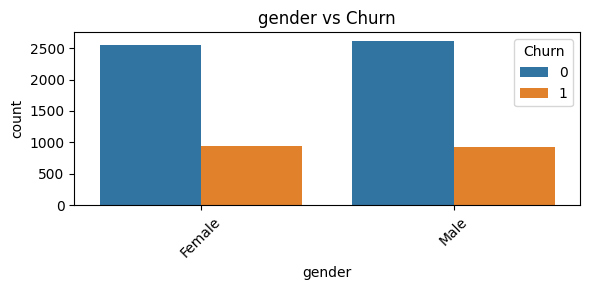

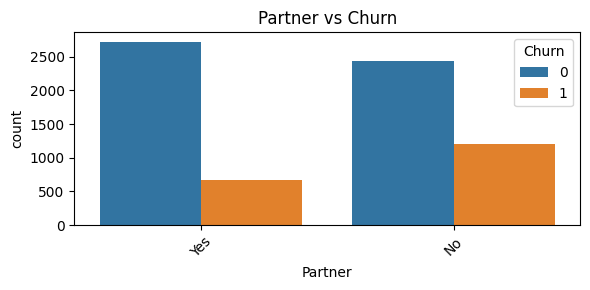

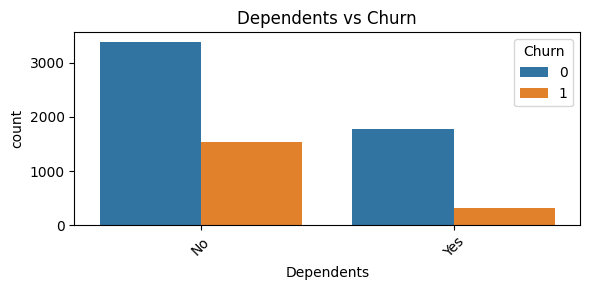

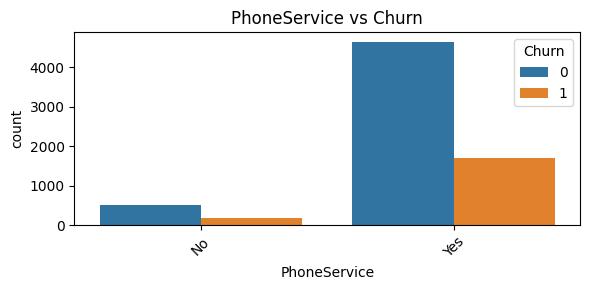

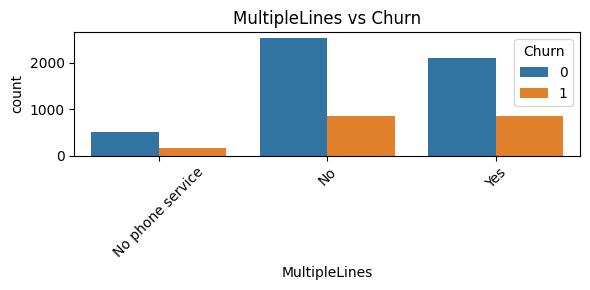

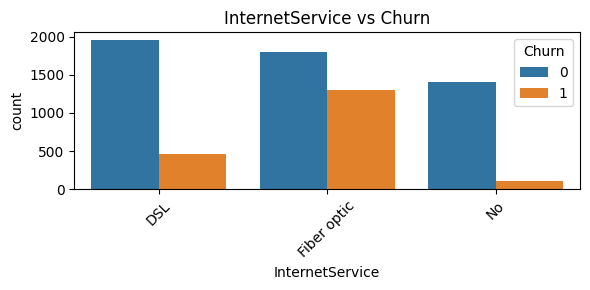

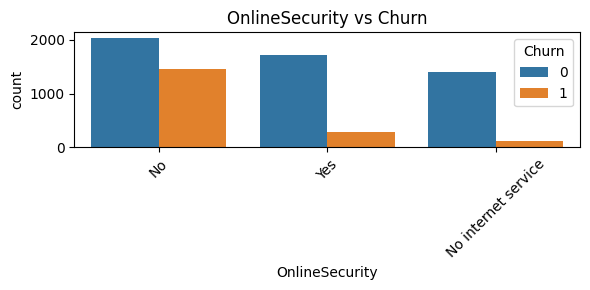

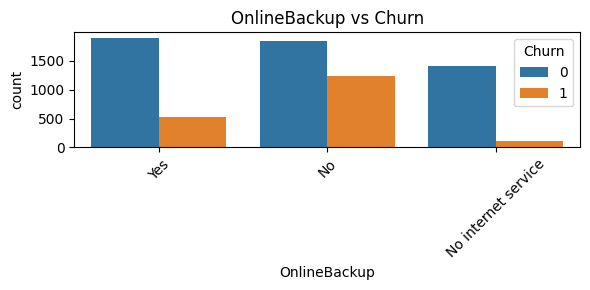

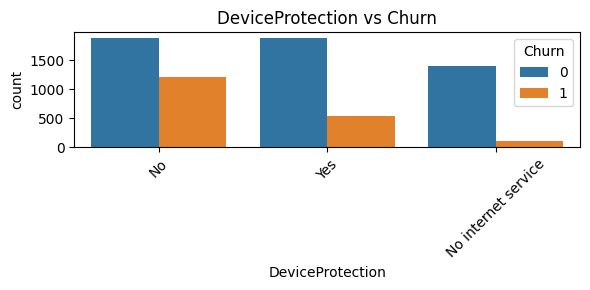

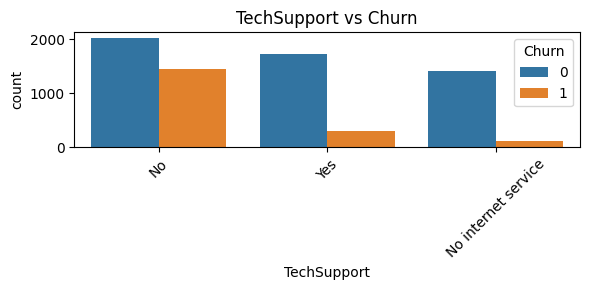

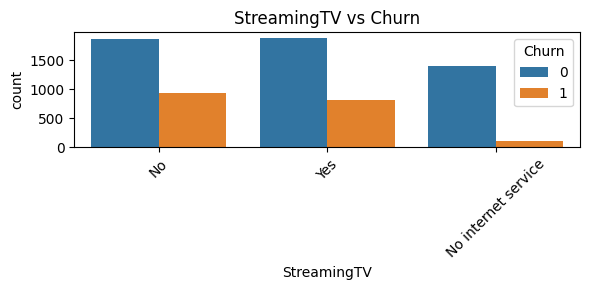

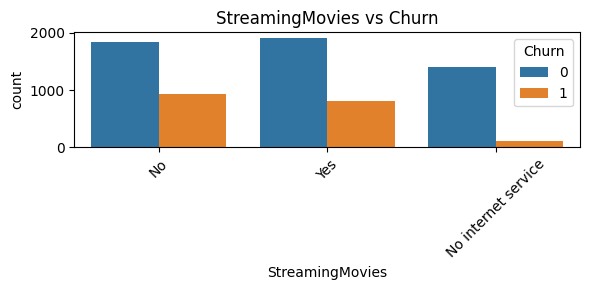

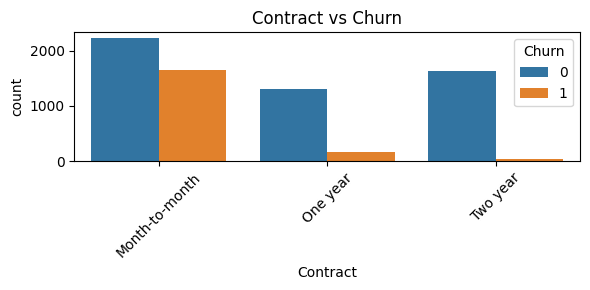

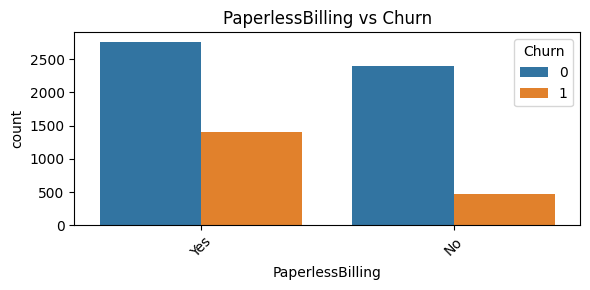

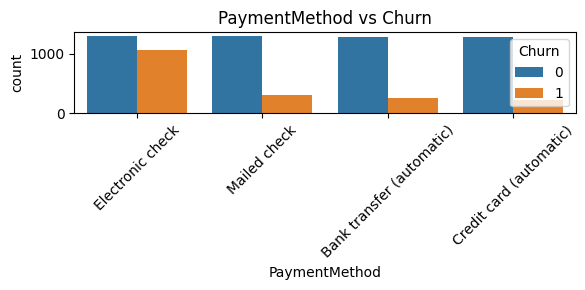

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preprocessing ringan
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.dropna(subset=['TotalCharges'], inplace=True)
df.drop(columns=['customerID'], inplace=True)

# ===============================
# Distribusi Target: Churn
# ===============================
plt.figure(figsize=(5, 3))
sns.countplot(x='Churn', data=df)
plt.title('Distribusi Churn (0 = Tidak, 1 = Ya)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# ===============================
# Distribusi Numerik
# ===============================
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.show()

# ===============================
# Korelasi
# ===============================
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols + ['Churn']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ===============================
# Boxplot Numerik vs Churn
# ===============================
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()

# ===============================
# Kategorikal vs Churn
# ===============================
cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# **Refine Data**

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load data
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Drop kolom ID yang tidak relevan
df.drop(columns=['customerID'], inplace=True)

# 3. Konversi TotalCharges ke numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 4. Buang baris yang memiliki nilai NaN
df.dropna(inplace=True)

# 5. Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 6. Identifikasi kolom kategorikal & numerik
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 7. One-hot encoding untuk kolom kategorikal
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 8. Scaling fitur numerik
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# 9. Pisahkan fitur dan target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 10. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 11. Cek hasil
print("✅ Refine selesai! Data siap untuk modeling.")
print("Shape X_train:", X_train.shape)
print("Shape X_test :", X_test.shape)
print("Jumlah fitur :", X.shape[1])


✅ Refine selesai! Data siap untuk modeling.
Shape X_train: (5625, 30)
Shape X_test : (1407, 30)
Jumlah fitur : 30


# **Membuat Model**

In [7]:
# ============================================
# 1. Import Library
# ============================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

**Logistic Regression**

📊 Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Confusion Matrix:
[[917 116]
 [159 215]]
ROC AUC Score: 0.8360144638688001


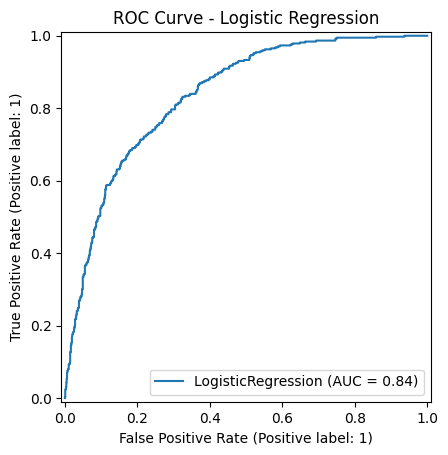

In [8]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("📊 Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("ROC AUC Score:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))

# ROC Curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

**Random Forest**


📊 Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[917 116]
 [180 194]]
ROC AUC Score: 0.816300065744858


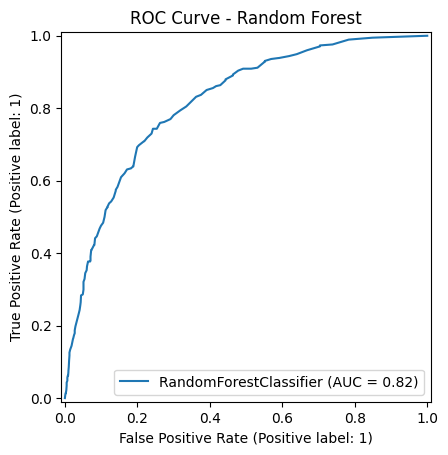

In [9]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n📊 Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

# **Validasi Model**

**VALIDASI MODEL - LOGISTIC REGRESSION**

📊 F1 per Fold (Logistic Regression): [0.59710145 0.62196862 0.56808199 0.61271676 0.59050445]
📈 Mean F1: 0.5980746541594855
📉 Std Dev: 0.01867151686378158


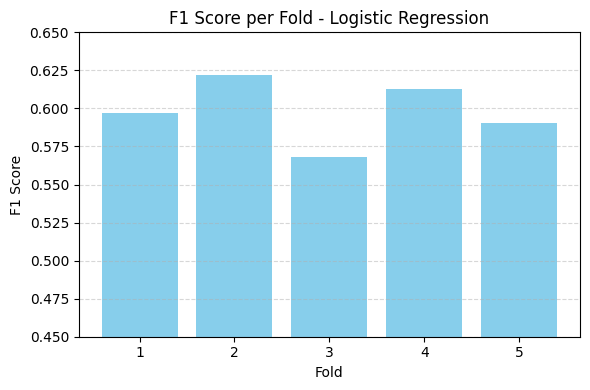

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Model
logreg = LogisticRegression(max_iter=1000)
logreg_scores = cross_val_score(logreg, X, y, cv=5, scoring='f1')

# Output
print("📊 F1 per Fold (Logistic Regression):", logreg_scores)
print("📈 Mean F1:", np.mean(logreg_scores))
print("📉 Std Dev:", np.std(logreg_scores))

# Plot langsung
plt.figure(figsize=(6, 4))
plt.bar(range(1, 6), logreg_scores, color='skyblue')
plt.title('F1 Score per Fold - Logistic Regression')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.ylim(0.45, 0.65)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



**VALIDASI MODEL - RANDOM FOREST**

📊 F1 per Fold (Random Forest): [0.56707317 0.53953488 0.51718984 0.55485893 0.56060606]
📈 Mean F1: 0.5478525769606926
📉 Std Dev: 0.01783569085527223


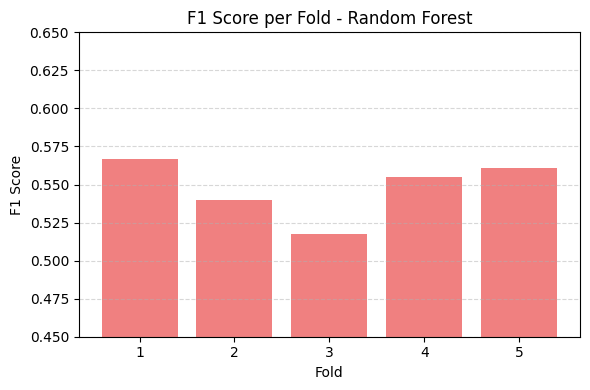

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='f1')

# Output
print("📊 F1 per Fold (Random Forest):", rf_scores)
print("📈 Mean F1:", np.mean(rf_scores))
print("📉 Std Dev:", np.std(rf_scores))

# Plot langsung
plt.figure(figsize=(6, 4))
plt.bar(range(1, 6), rf_scores, color='lightcoral')
plt.title('F1 Score per Fold - Random Forest')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.ylim(0.45, 0.65)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **Evaluasi Model**

**Evaluasi Logistic Regression**

📊 Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



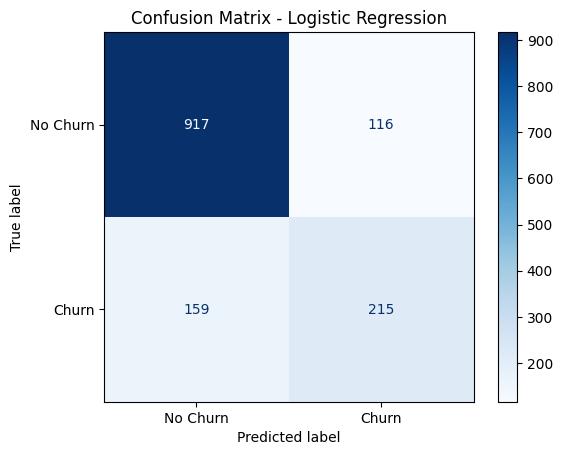

🎯 ROC AUC Score: 0.8360144638688001


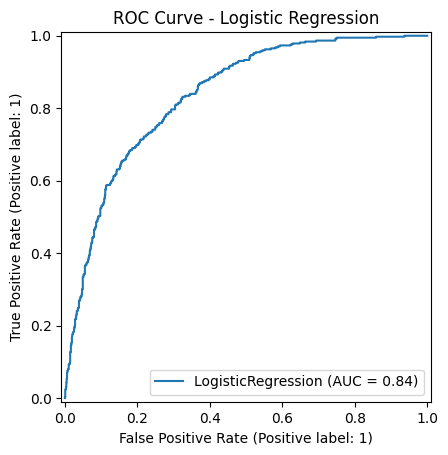

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

# Training ulang model pada train set
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Prediksi
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# Classification report
print("📊 Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_logreg))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm, display_labels=["No Churn", "Churn"]).plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC AUC
print("🎯 ROC AUC Score:", roc_auc_score(y_test, y_proba_logreg))
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()


**Evaluasi Random Forest**

📊 Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



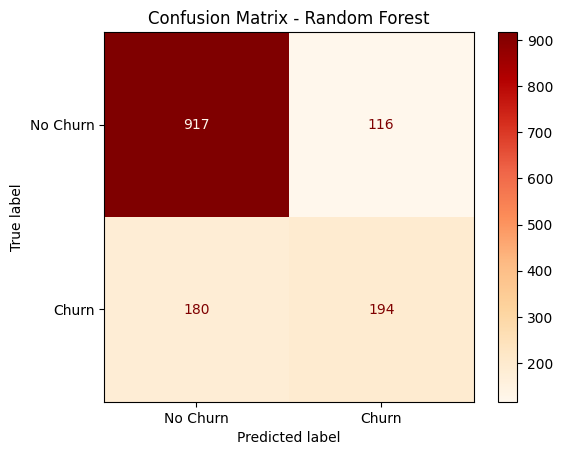

🎯 ROC AUC Score: 0.816300065744858


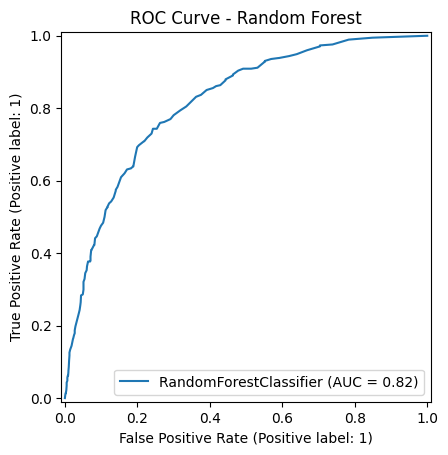

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Training ulang model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Classification report
print("📊 Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=["No Churn", "Churn"]).plot(cmap='OrRd')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC AUC
print("🎯 ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()


# **Model Refinement - Hyperparameter Tuning**

**Logistic Regression (dengan Grid Search)**

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Setup parameter grid
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

logreg = LogisticRegression(max_iter=1000)

# Grid Search
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='f1')
grid_logreg.fit(X_train, y_train)

# Best params & score
print("✅ Best Params (Logistic):", grid_logreg.best_params_)
print("📈 Best F1 Score:", grid_logreg.best_score_)

# Evaluasi di test set
best_logreg = grid_logreg.best_estimator_
y_pred_best_logreg = best_logreg.predict(X_test)
print(classification_report(y_test, y_pred_best_logreg))


✅ Best Params (Logistic): {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
📈 Best F1 Score: 0.596421087484738
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Parameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best params & score
print("✅ Best Params (RF):", grid_rf.best_params_)
print("📈 Best F1 Score:", grid_rf.best_score_)

# Evaluasi
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print(classification_report(y_test, y_pred_best_rf))


✅ Best Params (RF): {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
📈 Best F1 Score: 0.5793803816852229
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

